# Purpose

The purposes of this exercise to look into different features to observe their relationship, and plot a multiple linear regression based on several features of individual such as age, body mass index (bmi), gender etc to be used for predicting future medical expenses of individuals that help medical insurance to make decision on charging the premium.


# Predicting Insurance Premiums

Our simple dataset contains a few attributes for each person such as 
Age, Sex, BMI, Children, Smoker, Region and their charges


# Aim

To use this info to predict charges for new customers



In [1]:
### import the libraries:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
###loading the data:
insurance=pd.read_csv('insurance_1741527527948.csv')
insurance

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance.shape

(1338, 7)

In [5]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
insurance.drop_duplicates()

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]

In [7]:
insurance.shape

(1338, 7)

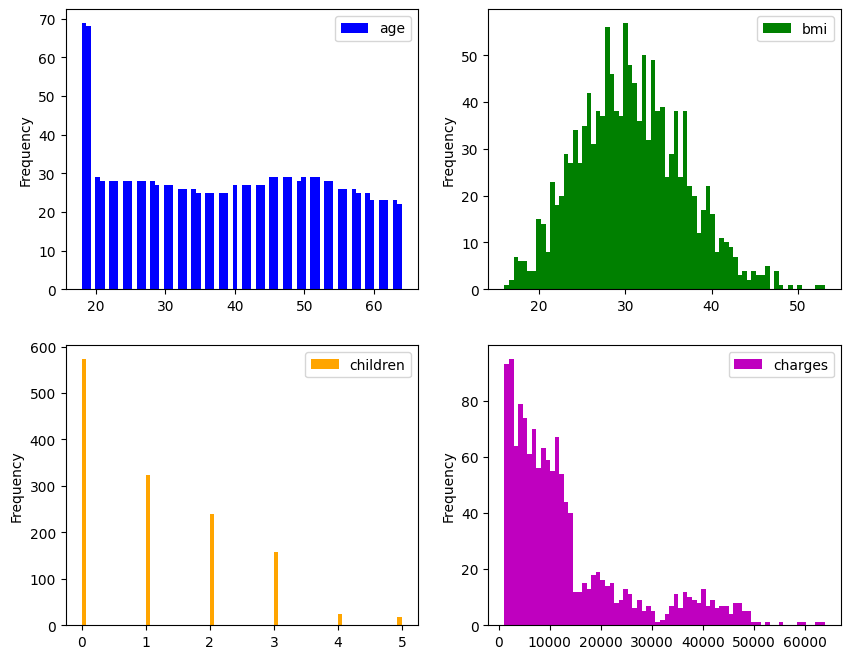

In [8]:
####Univariate Analysis:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(10,8))

insurance.plot(kind='hist',y='age',bins=70,color='b',ax=axes[0][0])
insurance.plot(kind='hist',y='bmi',bins=70,color='g',ax=axes[0][1])
insurance.plot(kind='hist',y='children',bins=70,color='orange',ax=axes[1][0])
insurance.plot(kind='hist',y='charges',bins=70,color='m',ax=axes[1][1])
plt.show()

In [9]:
insurance.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [10]:
insurance.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [11]:
insurance.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [12]:
insurance.corr(numeric_only=True)

age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

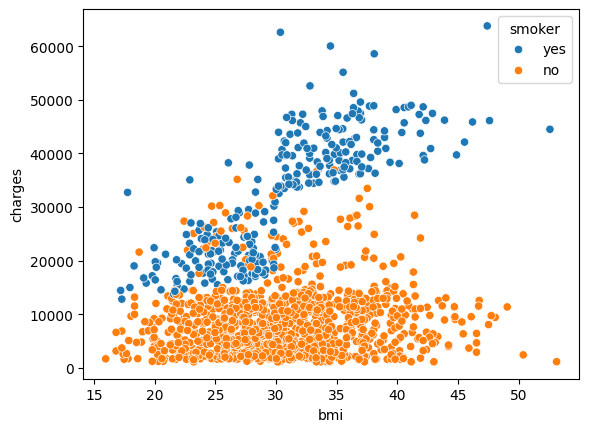

In [13]:
####Bivariate Analysis:
sns.scatterplot(x='bmi',y='charges',data=insurance,hue='smoker')
plt.show()

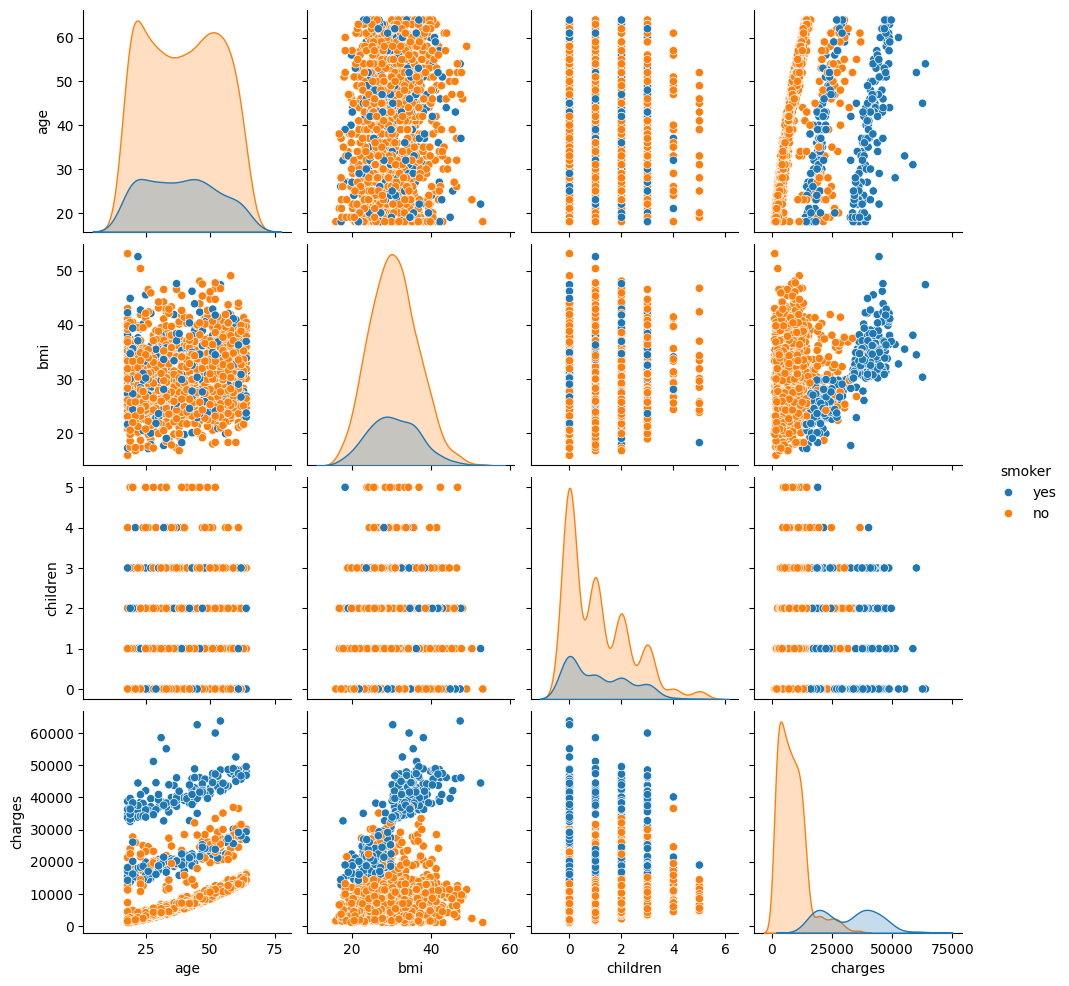

In [14]:
sns.pairplot(insurance,hue='smoker')
plt.show()

In [15]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [16]:
#### encoding the categorical variables:
insurance=pd.get_dummies(data=insurance,columns=['sex','region','smoker'],drop_first=True,dtype=int)

In [17]:
insurance.head()

age     bmi  children      charges  sex_male  region_northwest  \
0   19  27.900         0  16884.92400         0                 0   
1   18  33.770         1   1725.55230         1                 0   
2   28  33.000         3   4449.46200         1                 0   
3   33  22.705         0  21984.47061         1                 1   
4   32  28.880         0   3866.85520         1                 1   

   region_southeast  region_southwest  smoker_yes  
0                 0                 1           1  
1                 1                 0           0  
2                 1                 0           0  
3                 0                 0           0  
4                 0                 0           0

In [18]:
X=insurance.drop('charges',axis=1)
y=insurance['charges']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=50)

In [20]:
#### concatenating the training subsets,x_train,y_train into df(training set)
df=pd.concat([y_train,X_train],axis=1)
df.head()

charges  age     bmi  children  sex_male  region_northwest  \
69   17663.14420   28  23.980         3         1                 0   
852  42111.66470   46  35.530         0         0                 0   
771  11150.78000   53  26.700         2         0                 0   
33   13770.09790   63  28.310         0         1                 1   
168   2719.27975   19  31.825         1         0                 1   

     region_southeast  region_southwest  smoker_yes  
69                  1                 0           1  
852                 0                 0           1  
771                 0                 1           0  
33                  0                 0           0  
168                 0                 0           0

In [21]:
import statsmodels.formula.api as sm
model=sm.ols(formula="""charges~age+bmi+children+sex_male+region_northwest+region_southeast+region_southwest
+smoker_yes""",data=df).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     315.7
Date:                Fri, 14 Mar 2025   Prob (F-statistic):          1.37e-258
Time:                        19:15:27   Log-Likelihood:                -9486.9
No. Observations:                 936   AIC:                         1.899e+04
Df Residuals:                     927   BIC:                         1.904e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.116e+04   1187.143     -9.403      0.000   -1.35e+04   -8832.868
age                250.0355     14.433     17.324      0.000     221.711     278.360
bmi                318.4351     34.320      9.279      0.000     251.082     385.788
children           393.7459    167.717      2.348      0.019      64.597     722.895
sex_male          -312.1963    402.697     -0.775      0.438   -1102.501     478.108
region_northwest    -7.0968    567.188     -0.013      0.990   -1120.218    1106.025
region_southeast  -990.8407    572.633     -1.730      0.084   -2114.648     132.966
region_southwest  -207.4490    580.259     -0.358      0.721   -1346.223     931.325
smoker_yes        2.321e+04    500.592     46.364      0.000    2.22e+04    2.42e+04
==============================================================================
Omnibus:                      231.440   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              538.037
Skew:                           1.328   Prob(JB):                    1.47e-117
Kurtosis:                       5.597   Cond. No.                         307.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
import statsmodels.formula.api as sm
model_final=sm.ols(formula="""charges~age+bmi+children+smoker_yes""",data=df).fit()
model_final.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     629.8
Date:                Fri, 14 Mar 2025   Prob (F-statistic):          5.04e-263
Time:                        19:15:27   Log-Likelihood:                -9489.2
No. Observations:                 936   AIC:                         1.899e+04
Df Residuals:                     931   BIC:                         1.901e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.102e+04   1132.980     -9.730      0.000   -1.32e+04   -8800.959
age          251.8295     14.411     17.475      0.000     223.548     280.110
bmi          296.4544     32.632      9.085      0.000     232.414     360.495
children     398.1045    167.472      2.377      0.018      69.439     726.770
smoker_yes  2.311e+04    498.161     46.393      0.000    2.21e+04    2.41e+04
==============================================================================
Omnibus:                      234.485   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              554.997
Skew:                           1.336   Prob(JB):                    3.05e-121
Kurtosis:                       5.662   Cond. No.                         289.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""